In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from xml.etree import ElementTree
import folium

In [27]:
latitude = 52.372952
longitude = 4.906080

In [28]:
from google.colab import files
upload = files.upload()

Saving listings_details.csv to listings_details.csv


In [29]:
list_detail = pd.read_csv('listings_details.csv')
list_detail.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,...,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$100.00,$50.00,1,$20.00,3,15,today,t,17,44,44,44,2018-12-06,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,"From Central Station, walk towards the busstop...",You will have the entire house to yourself.,We will meet you in person for check in whenev...,"Our house comes with our very sweet, but old (...",NaN,NaN,https://a0.muscache.com/im/pictures/88955424/4...,NaN,3806,https://www.airbnb.com/users/show/3806,Maartje,2008-10-24,"Amsterdam, Noord-Holland, The Netherlands",I am a freelance radio producer and journalist...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/3806/profile_...,https://a0.muscache.com/im/users/3806/profile_...,Spaarndammer en Zeeheldenbuurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, Noord-Holland, Netherlands",Spaarndammer en Zeeheldenbuurt,Westerpark,...,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",NaN,$160.00,$543.00,"$2,000.00",$300.00,$40.00,2,$15.00,4,20,7 weeks ago,t,0,0,0,47,2018-12-06,42,2015-07-31,2018-08-29,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like al

In [30]:
import json
from google.colab import files
upload1 = files.upload()

Saving neighbourhoods.geojson to neighbourhoods (2).geojson


In [38]:
% pip install geopandas
import geopandas as gpd
n_json = gpd.read_file('neighbourhoods.geojson')

     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 15.3MB 295kB/s 
     |████████████████████████████████| 6.5MB 43.1MB/s 


In [39]:
from shapely.geometry import Point, LineString
#import adjustText as aT
n_json["longitude"] = n_json.centroid.x
n_json["latitude"] = n_json.centroid.y
n_json.drop('neighbourhood_group', axis=1, inplace=True)
n_json

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,neighbourhood,geometry,longitude,latitude
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",4.977317,52.320279
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",5.003523,52.398339
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",4.894589,52.415306
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",4.910489,52.394068
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",4.998377,52.360899
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",4.889084,52.376426
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",4.941492,52.371412
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",4.908287,52.367753
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",4.919954,52.357795
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",4.931061,52.342719


In [40]:
list_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [41]:
columns = ['id', 'name',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 
       'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [42]:
dt_cols = list_detail[columns]
print(dt_cols.shape)

(20030, 35)


In [43]:
dt_cols = dt_cols[dt_cols['has_availability'] == 't']
dt_cols.shape

(20030, 35)

In [44]:
dt_cols = dt_cols[dt_cols['availability_30'] != 0]
dt_cols = dt_cols[dt_cols['availability_60'] != 0]
dt_cols = dt_cols[dt_cols['availability_90'] != 0]
dt_cols = dt_cols[dt_cols['availability_365'] != 0]
dt_cols.shape

(8521, 35)

In [45]:
dt_cols.drop(['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)
dt_cols.shape

(8521, 30)

In [46]:
dt_cols = dt_cols[dt_cols['price'] != 0]
dt_cols = dt_cols[dt_cols['number_of_reviews'] != 0]
dt_cols = dt_cols[dt_cols['review_scores_rating'].notnull()]
dt_cols.shape

(7414, 30)

In [47]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [50]:
missing_data = examine_missing_values(dt_cols)
missing_data.head(20)

,Total,Percent
square_feet,7203,97.154033
cleaning_fee,965,13.015916
bathrooms,6,0.080928
beds,3,0.040464
bedrooms,3,0.040464
review_scores_value,2,0.026976
review_scores_location,2,0.026976
review_scores_communication,2,0.026976
review_scores_checkin,2,0.026976
room_type,0,0.000000


In [52]:
dt_cols.drop(['square_feet'], axis=1, inplace=True)
dt_cols.shape

(7414, 29)

In [53]:
dt_cols['review_scores_value'].fillna(dt_cols['review_scores_rating'], inplace=True)
dt_cols['review_scores_location'].fillna(dt_cols['review_scores_rating'], inplace=True)
dt_cols['review_scores_communication'].fillna(dt_cols['review_scores_rating'], inplace=True)
dt_cols['review_scores_checkin'].fillna(dt_cols['review_scores_rating'], inplace=True)

In [54]:
dt_cols['bathrooms'].fillna(0, inplace=True)
dt_cols['bedrooms'].fillna(0, inplace=True)
dt_cols['beds'].fillna(0, inplace=True)

In [55]:
dt_cols['cleaning_fee'].fillna(dt_cols['cleaning_fee'].mode()[0], inplace=True)

In [56]:
missing_data = examine_missing_values(dt_cols)
missing_data.head(20)

,Total,Percent
cancellation_policy,0,0.0
cleaning_fee,0,0.0
name,0,0.0
neighbourhood_cleansed,0,0.0
latitude,0,0.0
longitude,0,0.0
property_type,0,0.0
room_type,0,0.0
accommodates,0,0.0
bathrooms,0,0.0


In [57]:
dt_cols.shape

(7414, 29)

In [58]:
numeric_features = list(dt_cols.dtypes[dt_cols.dtypes != 'object'].index)
numeric_features.remove('id')
numeric_features.remove('latitude')
numeric_features.remove('longitude')
numeric_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [59]:
category_features = list(dt_cols.dtypes[dt_cols.dtypes == 'object'].index)
category_features.remove('name')
category_features

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'price',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

In [60]:
dt_cols['price'] = dt_cols['price'].apply(lambda x:x.lstrip('$'))
dt_cols['price'] = dt_cols['price'].apply(lambda x:x.replace(',',''))
dt_cols['price'] = dt_cols['price'].astype('float')
dt_cols['cleaning_fee'] = dt_cols['cleaning_fee'].apply(lambda x:x.lstrip('$'))
dt_cols['cleaning_fee'] = dt_cols['cleaning_fee'].astype('float')
dt_cols['extra_people'] = dt_cols['extra_people'].apply(lambda x:x.lstrip('$'))
dt_cols['extra_people'] = dt_cols['extra_people'].astype('float')

In [61]:
numeric_features.extend(['cleaning_fee', 'extra_people'])
numeric_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cleaning_fee',
 'extra_people']

In [62]:
category_features.remove('price')
category_features.remove('cleaning_fee')
category_features.remove('extra_people')

In [64]:
dt_cols.columns = ['neighbourhood' if x=='neighbourhood_cleansed' else x for x in dt_cols.columns]
features = dt_cols
print(features.shape)
features.head()

(7414, 29)


,id,name,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,59.0,50.0,1,20.0,3,15,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,125.0,40.0,2,10.0,14,60,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,52.386727,4.892078,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,150.0,0.0,1,0.0,2,730,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period
5,28658,Cosy guest room near city centre -1,Bos en Lommer,52.375342,4.857289,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,65.0,15.0,2,0.0,3,15,434,93.0,9.0,10.0,10.0,9.0,9.0,9.0,f,f,moderate
6,28871,Comfortable double room,Centrum-West,52.367187,4.890918,Apartment,Private room,2,0.0,1.0,1.0,Real Bed,75.0,50.0,1,0.0,2,1825,215,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate


In [65]:
category_features.remove('neighbourhood_cleansed')
category_features.append('neighbourhood')
category_features

['property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'neighbourhood']

In [66]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [68]:
def one_hot_encode(data, columns):
    onehot = pd.get_dummies(data[columns])
    onehot['id'] = data['id']
    fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
    onehot = onehot[fixed_columns]
    return onehot

In [69]:
features_onehot = one_hot_encode(features, category_features)
features_onehot.head(3)

,id,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Casa particular (Cuba),property_type_Castle,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,2818,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,25428,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    7414.000000
mean      162.796601
std       180.272825
min         0.000000
25%        99.000000
50%       135.000000
75%       190.000000
max      8500.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 162.80 and sigma = 180.26



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


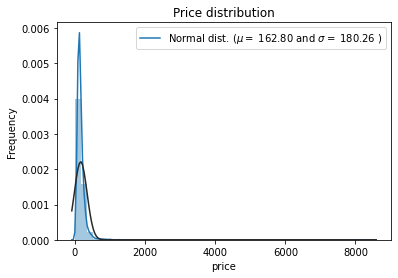

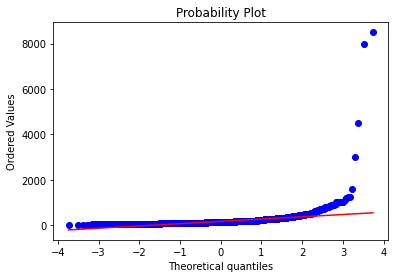

In [71]:
check_dist(features['price'])

In [72]:
features = features[features['price']<2000]

In [73]:
def correct_dist(price):
    price = np.log1p(price)
    sns.distplot(price , fit=norm);
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.93 and sigma = 0.52



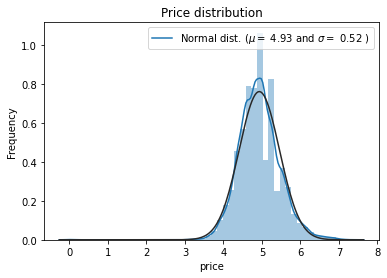

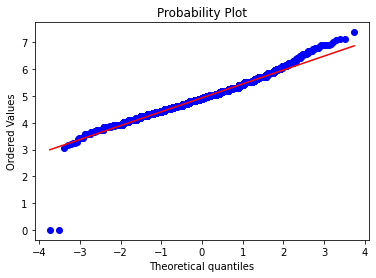

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
features['corrected_price'] = correct_dist(features['price'])

In [75]:
neighbourhood_count = pd.DataFrame({'neighbourhood': features['neighbourhood'].value_counts().index, 
                                    'count': features['neighbourhood'].value_counts().values})
neighbourhood_count.head(3)

,neighbourhood,count
0,De Baarsjes - Oud-West,1202
1,Centrum-West,1134
2,De Pijp - Rivierenbuurt,843


In [76]:
map_ams_count = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_count.choropleth(
    geo_data=n_json,
    data=neighbourhood_count,
    columns=['neighbourhood', 'count'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The number of properites',
    reset=True
)
map_ams_count

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [77]:
neighbourhood_price = features.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
4,Centrum-Oost,160.0
5,Centrum-West,155.5
21,Zuid,140.0
8,De Pijp - Rivierenbuurt,140.0
7,De Baarsjes - Oud-West,139.0


In [78]:
map_ams_price = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_price.choropleth(
    geo_data=n_json,
    data=neighbourhood_price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The average_price',
    reset=True
)
map_ams_price

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [79]:
CLIENT_ID = 'H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT' # your Foursquare ID
CLIENT_SECRET = 'JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT
CLIENT_SECRET:JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP


In [80]:
categories = {'Arts & Entertainment': '4d4b7104d754a06370d81259', 
                  'Event': '4d4b7105d754a06373d81259', 
                  'Food': '4d4b7105d754a06374d81259',
                  'Nightlife Spot': '4d4b7105d754a06376d81259',
                  'Outdoors & Recreation': '4d4b7105d754a06377d81259',
                  'Shop & Service': '4d4b7105d754a06378d81259',
                  'Travel & Transport': '4d4b7105d754a06379d81259'}

In [87]:
def getNearbyVenues(data, categories, radius=500, limit=10):
    
    venues_list=[]
    print('Obtaining venues around the neighbourhoods: ', end='')
    for name, lat, lng in zip(data['neighbourhood'], data['latitude'], data['longitude']):
        print('.', end='')
        # create the API request URL
        venues = {'neighbourhood':name}
        for category, category_id in categories.items():
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                category_id,
                radius, 
                limit)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items'] 
            venues[category] = len(results)
        venues_list.append(venues)

    venues_list = pd.DataFrame(venues_list)
    return venues_list